In [112]:
import seaborn as sns
import pandas as pd


sns.set_theme(style="whitegrid", palette="colorblind")


In [113]:
author_file = '../data/codes/all-authors.tsv'

author_df = pd.read_csv(author_file, index_col=False, sep='\t')
author_df.head(2)

,DOI,year,author
0,10.1145/3020165.3020168,2017,"Hienert, Daniel"
1,10.1145/2854946.2854970,2016,"McKay, Dana"


In [114]:
author_df.DOI.nunique()

135

In [115]:
print('Number of distinct authors:', author_df.author.nunique())

print('Number of papers per author:')
author_df.author.value_counts()

Number of distinct authors: 367
Number of papers per author:


Arguello, Jaime         6
Buchanan, George        6
Li, Yuan                6
Hienert, Daniel         5
Capra, Rob              5
                       ..
Schwind, Valentin       1
Windl, Maximiliane      1
Timmermans, Benjamin    1
Baden, Christian        1
Andrienko, Natalia      1
Name: author, Length: 367, dtype: int64

In [116]:
author_df.groupby('DOI').author.value_counts()

DOI                      author               
10.1145/2854946.2854970  Buchanan, George         1
                         McKay, Dana              1
10.1145/2854946.2854971  Kanhabua, Nattiya        1
                         Maus, Heiko              1
                         Niederée, Claudia        1
                                                 ..
10.1145/3498366.3505845  Aliannejadi, Mohammad    1
                         Huibers, Theo            1
                         Landoni, Monica          1
                         Murgia, Emiliana         1
                         Pera, Maria Soledad      1
Name: author, Length: 498, dtype: int64

In [117]:
citation_file = '../data/codes/all-data.one-hot.xlsx'

df = pd.read_excel(citation_file)
df.head(2)

,Conference,Year,Reference string,Type,Award,IIR study paper?,Notes,Reference author_string,Reference title_string,DOI,...,user_issue_trust,user_issue_memory,user_issue_information_behavior,user_issue_distraction,user_issue_user_behavior,user_issue_serendipity,user_group_disabilities,user_group_children,user_group_older_people,user_group_LGBTQ+
0,CHIIR,2016,"Hugo C. Huurdeman, Max L. Wilson, and Jaap Kam...",NaN,NaN,NaN,NaN,"Hugo C. Huurdeman, Max L. Wilson, and Jaap Kamps.",Active and Passive Utility of Search Interface...,10.1145/2854946.2854957,...,0,0,0,0,0,0,0,0,0,0
1,CHIIR,2016,"Tuan A. Tran, Sven Schwarz, Claudia NiederÃ©e,...",NaN,NaN,NaN,NaN,"Tuan A. Tran, Sven Schwarz, Claudia NiederÃ©e,...",The Forgotten Needle in My Collections: Task-A...,10.1145/2854946.2854971,...,0,0,0,0,0,0,0,0,0,0


In [118]:
citation_file = '../data/codes/all-data.one-hot.tsv'

df = pd.read_csv(citation_file, sep='\t')
df.head(2)

,zotero_ID,DOI,authors,title,year,type,pages,codes,keywords,abstract,...,user_issue_trust,user_issue_memory,user_issue_information_behavior,user_issue_distraction,user_issue_user_behavior,user_issue_serendipity,user_group_disabilities,user_group_children,user_group_older_people,user_group_LGBTQ+
0,52L8KDC2,10.1145/3176349.3176875,"Liu, Jingjing; Li, Yuan",Supporting Information Task Accomplishment: He...,2018,short,253-256,completed; design;method;questionnaire; design...,helpful system features; task accomplishment; ...,We investigated systems and their features tha...,...,0,0,0,0,0,0,0,0,0,0
1,DU9F4HUL,10.1145/3020165.3022130,"Jachja, Tiffany; Douglas, Oard W.",Goal-Directed Information Seeking in Time-Sync...,2017,short,269-272,completed; data;re-use;Apollo program resource...,apollo archive explorer; content linking; time...,We live in an era in which ubiquitous networks...,...,0,0,0,0,0,0,0,0,0,0


In [119]:
df.shape

(355, 172)

In [182]:
type_cols = [col for col in df.columns if col.startswith('design_type')]
df[type_cols]

,design_type_experimental,design_type_resource_paper,design_type_theoretical
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
350,1,0,0
351,1,0,0
352,1,0,0
353,1,0,0


In [120]:
df.authors.str.split('; ').explode('authors')

0           Liu, Jingjing
1                Li, Yuan
2         Jachja, Tiffany
3        Douglas, Oard W.
4          Hoeber, Orland
              ...        
1207           Fu, Hengyi
1208    Inthiran, Anushia
1209        Htun, Nyi Nyi
1210       Halvey, Martin
1211       Baillie, Lynne
Name: authors, Length: 1212, dtype: object

In [183]:
def parse_author_string(author_string):
    author_string = author_string.strip('.')
    if ' and ' not in author_string:
        # should be single author
        return author_string
    head, last_author = author_string.split(' and ')
    head_authors = head.strip(',').split(', ')
    return head_authors + [last_author]
    

def parse_author(author_string):
    authors = author_string.strip(';').split('; ')
    return authors
    

#df['author'] = df['Reference author_string'].apply(parse_author_string)
df['author'] = df['authors'].apply(parse_author)
author_df = df.explode('author')[['DOI', 'year', 'author'] + type_cols]
author_df

,DOI,year,author,design_type_experimental,design_type_resource_paper,design_type_theoretical
0,10.1145/3176349.3176875,2018,"Liu, Jingjing",1,0,0
0,10.1145/3176349.3176875,2018,"Li, Yuan",1,0,0
1,10.1145/3020165.3022130,2017,"Jachja, Tiffany",1,0,0
1,10.1145/3020165.3022130,2017,"Douglas, Oard W.",1,0,0
2,10.1145/3020165.3020178,2017,"Hoeber, Orland",1,0,0
...,...,...,...,...,...,...
352,10.1145/3020165.3022126,2017,"Fu, Hengyi",1,0,0
353,10.1145/3020165.3022125,2017,"Inthiran, Anushia",1,0,0
354,10.1145/3020165.3020171,2017,"Htun, Nyi Nyi",1,1,0
354,10.1145/3020165.3020171,2017,"Halvey, Martin",1,1,0


In [122]:
print('Number of distinct authors:', author_df.author.nunique())

print('Number of papers per author:')
author_df.author.value_counts()

Number of distinct authors: 742
Number of papers per author:


Shah, Chirag            18
Capra, Rob              15
McKay, Dana             12
Arguello, Jaime         11
Hienert, Daniel          9
                        ..
Beznosov, Konstantin     1
Gomes, Sebastian         1
Benham, Rodger           1
Mackenzie, Joel          1
Inthiran, Anushia        1
Name: author, Length: 742, dtype: int64

In [124]:
s = author_df.DOI.value_counts()
s.value_counts()

3     101
2      93
4      73
5      38
6      20
1      17
7       8
8       2
12      1
11      1
9       1
Name: DOI, dtype: int64

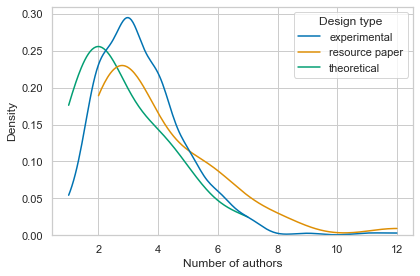

In [211]:
type_author_counts = {}
for type_col in type_cols:
    type_author_counts[type_col] = author_df[author_df[type_col] == 1].DOI.value_counts()
    
    
type_num_authors = pd.DataFrame(data=type_author_counts)
type_num_authors = type_num_authors.melt().dropna()
type_num_authors['Design type'] = type_num_authors.variable.apply(lambda x: x.replace('design_type_', '').replace('_', ' '))
ax = sns.kdeplot(data=type_num_authors, x='value', hue='Design type', common_norm=False, cut=0);

ax.set_xlabel('Number of authors');
ax.figure.tight_layout()
ax.figure.savefig('../images/collaboration-authors-per-paper-design-type-dist.png', dpi=300)


In [125]:
s.describe()

count    355.000000
mean       3.414085
std        1.562384
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       12.000000
Name: DOI, dtype: float64

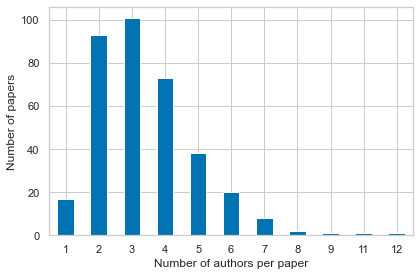

In [126]:
ax = s.value_counts().sort_index().plot(kind='bar', rot=0);

ax.set_xlabel('Number of authors per paper');
ax.set_ylabel('Number of papers');

ax.figure.tight_layout()
ax.figure.savefig('../images/collaboration-authors-per-paper-dist.png', dpi=300)


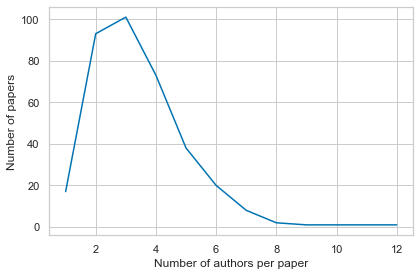

In [127]:
ax = s.value_counts().sort_index().plot(kind='line', rot=0);

ax.set_xlabel('Number of authors per paper');
ax.set_ylabel('Number of papers');

ax.figure.tight_layout()
ax.figure.savefig('../images/collaboration-authors-per-paper-dist.png', dpi=300)


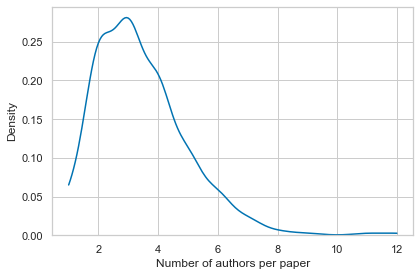

In [220]:
num_authors = author_df.DOI.value_counts().reset_index().rename(columns={'DOI': 'Number of authors'})
ax = sns.kdeplot(data=num_authors, x='Number of authors', cut=0);

ax.set_xlabel('Number of authors per paper');
#ax.set_ylabel('Number of papers');

ax.figure.tight_layout()
ax.figure.savefig('../images/collaboration-authors-per-paper-dist.png', dpi=300)


In [128]:
g = author_df.groupby(['year']).DOI.value_counts()
g = g.to_frame().rename(columns={'DOI': 'Number of authors'}).reset_index().drop('DOI', axis=1)
g

,year,Number of authors
0,2016,7
1,2016,7
2,2016,6
3,2016,5
4,2016,5
...,...,...
350,2022,2
351,2022,2
352,2022,2
353,2022,2


In [135]:
g[g['Number of authors'] >= 1]
g.year.value_counts().sum()


355

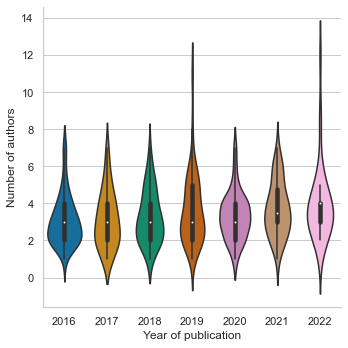

In [145]:
grid = sns.catplot(data=g, y="Number of authors", x="year", kind="violin");

grid.ax.set_xlabel('Year of publication');
grid.figure.tight_layout();
grid.figure.savefig('../images/collaboration-authors-per-paper-year-dist.png', dpi=300)


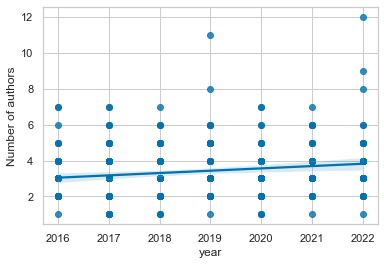

In [153]:
sns.regplot(data=g, x='year', y='Number of authors', logx=True, x_ci='sd');

In [175]:
X = (author_df
    .groupby(['year'])[["DOI"]]
    .value_counts()
    .reset_index(name='num_authors').drop('DOI', axis=1)
    #.pipe(pd.get_dummies, columns=['year'])
    .assign(intercept=1)  # Adds a column called 'intercept' with all values equal to 1.
    .sort_values(by='num_authors')
    .reset_index(drop=True)
)

y = X.pop("num_authors")
y
X
#author_df.groupby(['year'])[["DOI"]].value_counts().reset_index(name='num_authors').drop('DOI', axis=1).pipe(pd.get_dummies, columns=['year']).assign(intercept=1)

,year,intercept
0,2022,1
1,2016,1
2,2017,1
3,2017,1
4,2017,1
...,...,...
350,2019,1
351,2022,1
352,2022,1
353,2019,1


In [177]:
import statsmodels.api as sm
import numpy as np

model_no_indicators = sm.GLM(
    y,
    X["intercept"],
    offset=np.log(X["year"]),
    family=sm.families.Poisson(),
)
result_no_indicators = model_no_indicators.fit()
print(result_no_indicators.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            num_authors   No. Observations:                  355
Model:                            GLM   Df Residuals:                      354
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -654.33
Date:                Mon, 24 Oct 2022   Deviance:                       234.62
Time:                        15:19:42   Pearson chi2:                     253.
No. Iterations:                     4   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.3824      0.029   -222.195      0.0

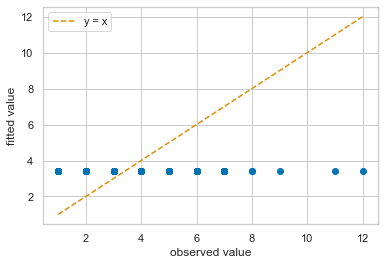

In [178]:
plt.plot(y, result_no_indicators.fittedvalues, 'o')
plt.plot(y, y, '--', label='y = x')
plt.ylabel("fitted value")
plt.xlabel("observed value")
plt.legend()
plt.show()

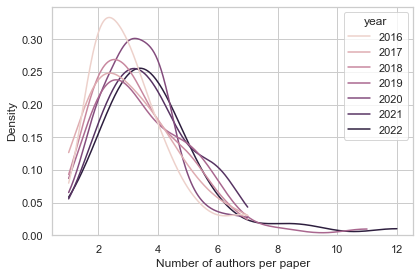

In [227]:
ax = sns.kdeplot(data=g, x='Number of authors', hue='year', common_norm=False, cut=0);
ax.set_xlabel('Number of authors per paper');
#ax.set_ylabel('Number of papers');

ax.figure.tight_layout()
ax.figure.savefig('../images/collaboration-authors-per-paper-year-dist.png', dpi=300)


In [221]:
g.groupby('year')['Number of authors'].value_counts().swaplevel(0,1).unstack().fillna(0.0)
#.plot()

year,2016,2017,2018,2019,2020,2021,2022
Number of authors,,,,,,,
1,1.0,7.0,3.0,1.0,3.0,1.0,1.0
2,19.0,17.0,15.0,15.0,14.0,7.0,6.0
3,15.0,14.0,14.0,13.0,20.0,11.0,14.0
4,8.0,11.0,8.0,6.0,19.0,9.0,12.0
5,3.0,6.0,7.0,9.0,4.0,4.0,5.0
6,1.0,3.0,3.0,4.0,2.0,5.0,2.0
7,2.0,2.0,1.0,0.0,2.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [105]:
g2 = g.groupby('year')['Number of authors'].value_counts().to_frame().rename(columns={'Number of authors': 'Freq'}).reset_index()

g.groupby('year')['Number of authors'].describe()


,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2016,49.0,3.081633,1.320302,1.0,2.0,3.0,4.00,7.0
2017,60.0,3.150000,1.527433,1.0,2.0,3.0,4.00,7.0
2018,51.0,3.274510,1.429384,1.0,2.0,3.0,4.00,7.0
2019,50.0,3.640000,1.837923,1.0,2.0,3.0,5.00,11.0
2020,64.0,3.328125,1.285508,1.0,2.0,3.0,4.00,7.0
2021,38.0,3.710526,1.450217,1.0,3.0,3.5,4.75,7.0
2022,43.0,3.930233,1.980805,1.0,3.0,4.0,4.00,12.0


In [228]:
doi_author = pd.get_dummies(data=author_df[['DOI', 'author']], columns=['author'], prefix='', prefix_sep='')
doi_author = doi_author.groupby('DOI').sum()
author_cooc = doi_author.T.dot(doi_author)
author_cooc

,"Abbas, Fakhri","Abela, Charlie","Abualsaud, Mustafa","Agichtein, Eugene","Ahmadvand, Ali","Ai, Qingyao","Aigner, Johannes","Aker, Ahmet","Al-Doulat, Ahmad","Al-Harbi, Aiman L.",...,"den Hengst, Floris","ter Hoeve, Maartje","van Gennip, Doménique","van Gerwen, Emile","van Ossenbruggen, Jacco","van Zeelt, Mickey","van den Bosch, Antal","van den Hoven, Elise","van der Vaart, Merel","von Hoyer, Johannes"
"Abbas, Fakhri",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Abela, Charlie",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Abualsaud, Mustafa",0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Agichtein, Eugene",0,0,0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Ahmadvand, Ali",0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"van Zeelt, Mickey",0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
"van den Bosch, Antal",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
"van den Hoven, Elise",0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
"van der Vaart, Merel",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [229]:
s = author_cooc.sum().sort_values(ascending=False).value_counts()
s = s.sort_index()
author_cooc.sum().sort_values(ascending=False).describe()

count    742.000000
mean       6.741240
std        6.067359
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       53.000000
dtype: float64

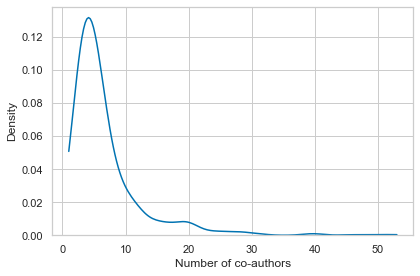

In [239]:
num_cooc = author_cooc.sum().reset_index(name='Number of co-authors')
#sns.kdeplot(data=num_cooc, x='Number of co-authors', cut=0, log_scale=True);
ax = sns.kdeplot(data=num_cooc, x='Number of co-authors', cut=0);
ax.set_xlabel('Number of co-authors');


ax.figure.tight_layout()
ax.figure.savefig('../images/collaboration-co-authors-per-author-dist.png')


In [230]:
s

1       8
2      76
3     112
4     135
5      98
6      88
7      40
8      31
9      29
10     12
11     20
12     17
13      3
14      8
15      6
16      7
17      5
18      4
19      6
20     12
21      3
22      1
23      3
25      4
26      1
28      4
29      1
31      2
39      1
40      2
46      1
50      1
53      1
dtype: int64

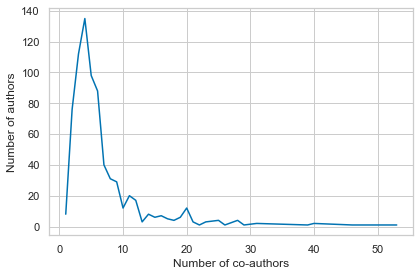

In [109]:
s = author_cooc.sum().sort_values(ascending=False).value_counts()
s = s.sort_index()
#s = s / s.sum()
ax = s.sort_index().plot();

ax.set_xlabel('Number of co-authors');
ax.set_ylabel('Number of authors');

ax.figure.tight_layout()
ax.figure.savefig('../images/collaboration-co-authors-per-author-dist.png')

#sns.kdeplot(data=author_cooc.sum(), cut=0)

In [110]:
import networkx as nx

G = nx.from_pandas_adjacency(author_cooc)
print(nx.info(G))

Graph with 742 nodes and 2352 edges


/var/folders/xk/pp9n20396sqccydf42gn2rmr0000gn/T/ipykernel_5323/4117910252.py:4: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [111]:
for cc in sorted(nx.connected_components(G), key = lambda x: len(x), reverse=True):
    print(len(cc))

244
40
39
24
22
16
16
13
13
12
11
10
9
9
8
7
7
7
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1


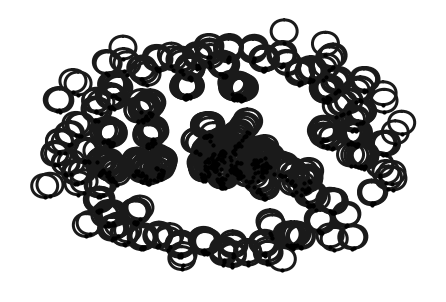

In [26]:
import matplotlib.pyplot as plt

options = {
    'node_color': 'black',
    'node_size': 10,
    'width': 3,
}


nx.draw(G, with_labels=False, **options)
plt.show()


In [85]:
from bokeh.io import output_file, show
from bokeh.plotting import figure, from_networkx

width = 2
ax_range=(-width, width)
plot = figure(title="Networkx Integration Demonstration", x_range=ax_range, y_range=ax_range,
              tools="", toolbar_location=None)

graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

output_file("networkx_graph.html")
show(plot)
